In [1]:
# import all the required packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import norm

## EDA (Exploratory Data Analysis)

In [2]:
# read the file (you can download the csv file from the address below:
## https://github.com/shluberoi/EVERGREEN/blob/master/IE_Project/data/Species-Checklist1.csv)
check_list = pd.read_csv('Species-Checklist1.csv')
# understand the columns
check_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28138 entries, 0 to 28137
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TAXON_ID                28138 non-null  int64  
 1   SCIENTIFIC_NAME         28138 non-null  object 
 2   COMMON_NAME             22150 non-null  object 
 3   AUTHORITY               26934 non-null  object 
 4   PRIMARY_DISCIPLINE      28138 non-null  object 
 5   ALL_DISCIPLINE_CODES    28138 non-null  object 
 6   ORIGIN                  2392 non-null   object 
 7   TREATIES                121 non-null    object 
 8   SHORT_NAME              8576 non-null   object 
 9   TAXON_LEVEL_CDE         28138 non-null  object 
 10  PARENT_TAXON_ID         28138 non-null  int64  
 11  PARENT_TAXON_LEVEL_CDE  28138 non-null  object 
 12  TAXON_TYPE              28122 non-null  object 
 13  NVIS_GROWTHFORM         5845 non-null   object 
 14  FFG_ACT_STATUS          718 non-null  

In [3]:
check_list.head()

,TAXON_ID,SCIENTIFIC_NAME,COMMON_NAME,AUTHORITY,PRIMARY_DISCIPLINE,ALL_DISCIPLINE_CODES,ORIGIN,TREATIES,SHORT_NAME,TAXON_LEVEL_CDE,...,NVIS_GROWTHFORM,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,SCIENTIFIC_NME_SYNONYM,COMMON_NME_SYNONYM,RESTRICTED_FLAG,PRINT_ORDER_NUM,LAST_MOD,EXTRACT_DATE
0,5016,Acanthogobius flavimanus,Yellowfin Goby,"(Temmninck & Schlegel, 1845)",Aquatic fauna,[tf][ma][ai][af],Introduced,NaN,aca flav,spec,...,NaN,NaN,NaN,NaN,Gobius flavimanus,"Japanese Goby, Oriental Goby",NaN,NaN,20130916,1/9/20
1,4917,Acanthopagrus australis,Yellow-fin Bream,"(G¸nther, 1859)",Aquatic fauna,[ma][ai][af][tf],NaN,NaN,aca aus,spec,...,NaN,NaN,NaN,NaN,Chrysophrys australis,"Silver Bream, Common Bream, Australian Seabrea...",NaN,NaN,20170505,1/9/20
2,4918,Acanthopagrus butcheri,Black Bream,"(Munro, 1949)",Aquatic fauna,[ai][ma][tf][af],NaN,NaN,aca but,spec,...,NaN,NaN,NaN,NaN,Mylio butcheri,"Blue Nose Bream, Yellowfin Bream, Bream, Silve...",NaN,NaN,20120816,1/9/20
3,5018,Afurcagobius tamarensis,Tamar Goby,"(Johnston, 1883)",Aquatic fauna,[af][ai][tf],NaN,NaN,afu tam,spec,...,NaN,NaN,NaN,NaN,"Gobius tamarensis, Gobius tasmanicus","Tamar Goby, Tasman Goby",NaN,NaN,20120816,1/9/20
4,4736,Alabes dorsalis,Common Shore-eel,"(Richardson, 1845)",Aquatic fauna,[af],NaN,NaN,NaN,spec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20100916,1/9/20


In [4]:
# drop the unnecessary columns 
check_list.drop(columns=['AUTHORITY','PRINT_ORDER_NUM',
                         'ALL_DISCIPLINE_CODES','TAXON_ID',
                         'TAXON_LEVEL_CDE','NVIS_GROWTHFORM',
                        'PARENT_TAXON_LEVEL_CDE','LAST_MOD',
                        'EXTRACT_DATE','RESTRICTED_FLAG',
                         'TREATIES','SHORT_NAME','PARENT_TAXON_ID',
                        'SCIENTIFIC_NME_SYNONYM','COMMON_NME_SYNONYM'], inplace=True)
check_list.shape

(28138, 8)

In [5]:
# understand the columns
check_list.columns

Index(['SCIENTIFIC_NAME', 'COMMON_NAME', 'PRIMARY_DISCIPLINE', 'ORIGIN',
       'TAXON_TYPE', 'FFG_ACT_STATUS', 'EPBC_ACT_STATUS',
       'VIC_ADVISORY_STATUS'],
      dtype='object')

In [6]:
# native species and outcomers

In [7]:
check_list.ORIGIN.unique()

array(['Introduced', nan, 'Native but some stands may be alien',
       'Naturalised alien',
       'Introduced but doubt it ever established a population in victoria',
       'Doubt that it has ever been established in victoria'],
      dtype=object)

In [8]:
check_list.PRIMARY_DISCIPLINE.unique()

array(['Aquatic fauna', 'Aquatic invertebrates', 'Flora', 'Marine',
       'Terrestrial fauna'], dtype=object)

## Categorize the species

In [9]:
flora = check_list.loc[check_list.PRIMARY_DISCIPLINE=='Flora']
# as we only focus on terrestrial fauna
fauna = check_list.loc[check_list.PRIMARY_DISCIPLINE=='Terrestrial fauna']
print(flora.shape)
print(fauna.shape)

(9850, 8)
(5302, 8)


# Invasive animals

In [10]:
# extract the invasive animals living in VVP
invasive_species = check_list.loc[check_list.ORIGIN == 'Introduced']
## the invasive animals listed on Agriculture Victoria website
inv_ani = ["Sus scrofa","Felis catus","Lepus europaeus","Oryctolagus cuniculus",\
          "Capra hircus","Duttaphrynus melanostictus","Trachemys scripta elegans","Vulpes vulpes"]
invasive_species.loc[invasive_species.SCIENTIFIC_NAME.isin(inv_ani)]

,SCIENTIFIC_NAME,COMMON_NAME,PRIMARY_DISCIPLINE,ORIGIN,TAXON_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS
23682,Capra hircus,Goat (feral),Terrestrial fauna,Introduced,Mammals,NaN,NaN,NaN
24738,Felis catus,Domestic Cat (feral),Terrestrial fauna,Introduced,Mammals,NaN,NaN,NaN
25612,Lepus europaeus,European Brown Hare,Terrestrial fauna,Introduced,Mammals,NaN,NaN,NaN
26461,Oryctolagus cuniculus,European Rabbit,Terrestrial fauna,Introduced,Mammals,NaN,NaN,NaN
27586,Sus scrofa,Pig (feral),Terrestrial fauna,Introduced,Mammals,NaN,NaN,NaN
28050,Vulpes vulpes,Red Fox,Terrestrial fauna,Introduced,Mammals,NaN,NaN,NaN


## Threatened animals

In [11]:
check_list.FFG_ACT_STATUS.unique()

array([nan, 'Listed', 'Rejected', 'De-listed', 'Nominated',
       'Invalid/ineligible/rejected'], dtype=object)

In [12]:
check_list.EPBC_ACT_STATUS.unique()

array([nan, 'Critically Endangered', 'Endangered', 'Vulnerable',
       'Extinct', 'Near Threatened'], dtype=object)

In [13]:
check_list.VIC_ADVISORY_STATUS.unique()

array([nan, 'Regionally extinct', 'Vulnerable', 'Endangered',
       'Data deficient', 'Critically endangered', 'Near threatened',
       'Presumed extinct', 'Rare',
       'All infraspecific taxa included in Advisory List', 'Poorly known',
       'Extinct in the Wild'], dtype=object)

## Endangered/CR flora and fauna

In [14]:
def endangered_filter(df):
    # filter out the flora and fauna whose risk level is lower than endangered 
    output = df.drop(df[(df.FFG_ACT_STATUS.isnull())|
                        (df.EPBC_ACT_STATUS.isnull())|
                        (df.VIC_ADVISORY_STATUS.isnull())].index)
    # filter out the columns that unnecessary for endangered species
    output.drop(columns=['ORIGIN'],inplace=True)
    output.rename(columns={'PRIMARY_DISCIPLINE':'SPECIES','TAXON_TYPE':'ANIMAL_TYPE'}, inplace=True)
    output = output.loc[(output.EPBC_ACT_STATUS.isin(['Endangered','Critically Endangered'])) |
                        (output.VIC_ADVISORY_STATUS.isin(['Endangered','Critically Endangered']))]
    # reset the index
    output = output.reset_index(drop=True)
    return output

In [15]:
# filter out the secure animals
e_flora = endangered_filter(flora)
e_fauna = endangered_filter(fauna)
print(e_flora.shape)
print(e_fauna.shape)

(74, 7)
(47, 7)


### Fauna data wrangling

In [16]:
# combine the birds taxon type
for i in e_fauna.index.values:
    taxon = e_fauna.loc[i,'ANIMAL_TYPE']
    if taxon in ['Marine birds','Other Non-passerine birds','Passerine birds']:
        e_fauna.loc[i,'ANIMAL_TYPE'] = 'Birds'
# add a column to distinguish the fauna in VVP
e_fauna['BIOREGION'] = 'VVP'
e_fauna['IMAGE'] = ''

In [17]:
# group by the taxon and count the proportion
pie = e_fauna.groupby('ANIMAL_TYPE').agg('count')

In [18]:
pie

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE
ANIMAL_TYPE,,,,,,,,
Amphibians,5,5,5,5,5,5,5,5
Bats,2,2,2,2,2,2,2,2
Birds,17,17,17,17,17,17,17,17
Invertebrates,3,3,3,3,3,3,3,3
Mammals,10,10,10,10,10,10,10,10
Reptiles,6,6,6,6,6,6,6,6
Waders,4,4,4,4,4,4,4,4


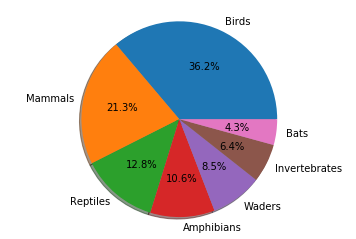

In [19]:
# the pie chart for showing the group distribution of endangered or critically endangered fauna species
counts = e_fauna['ANIMAL_TYPE'].value_counts()
labels = counts.index.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [20]:
e_fauna.loc[e_fauna.SCIENTIFIC_NAME=='Dasyurus maculatus maculatus']

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,ANIMAL_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE
9,Dasyurus maculatus maculatus,Spot-tailed Quoll,Terrestrial fauna,Mammals,Listed,Endangered,Endangered,VVP,


In [21]:
# character fauna species listed in grassland community
a_string = "Eastern Grey Kangaroo, Fat-tailed Dunnart, Common Dunnart, Eastern Barred Bandicoot, White-striped Mastiff-bat, Striped Legless-lizard, Glossy Grass Skink, Southern Grass Skink, Bougainville's Skink, Cunningham's Skink, Tussock Skink, Common Blue-tongue Lizard, Tiger Snake, Eastern Brown Snake, Little Whip Snake, Marbled Gecko, Growling Grass Frog, Bibron’s Toadlet, Common Eastern Froglet, Eastern Sign-bearing Froglet, Southern Bullfrog, Southern Toadlet, Spotted Marsh Frog, Striped Marsh Frog, Peron's Tree Frog, Southern Brown Tree Frog, Eastern Banjo Frog, Stubble Quail, Red-chested Button-quail, Willie wagtail, Welcome Swallow, Australian Kestrel, Galah, Flame Robin, Black-shouldered Kite, Brown Falcon, Richards Pipit, Little Raven, Masked Lapwing, Magpie Lark, White-fronted Chat, Yellow-rumped Thornbill, Brown Songlark, Rufous Songlark, Golden-headed Cisticola, White-plumed Honeyeater, Brolga, Plains wanderer, Australian Bustard, White-faced Heron, Australian White Ibis, Straw-necked Ibis, Little Eagle, Sulphur-crested Cockatoo, Australian Magpie, Australasian Pipit, Horsfield's Bushlark, Common Greenfinch, Eurasian Skylark, House Sparrow, European Goldfinch, Common Starling, Common Myna, Crested Pigeon, Eastern Rosella, Grey Teal, Red-rumped Parrot, Long-billed Corella, Bush Stone-curlew, Wedge-tailed Eagle, Golden Sun Moth"
target = a_string.split(', ')
len(target)

71

In [22]:
test = check_list.loc[check_list.COMMON_NAME.isin(target)]
test

,SCIENTIFIC_NAME,COMMON_NAME,PRIMARY_DISCIPLINE,ORIGIN,TAXON_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS
22846,Acanthiza chrysorrhoa,Yellow-rumped Thornbill,Terrestrial fauna,NaN,Passerine birds,NaN,NaN,NaN
22887,Acridotheres tristis,Common Myna,Terrestrial fauna,Introduced,Passerine birds,NaN,NaN,NaN
22977,Alauda arvensis,Eurasian Skylark,Terrestrial fauna,Introduced,Passerine birds,NaN,NaN,NaN
23072,Anas gracilis,Grey Teal,Terrestrial fauna,NaN,Other Non-passerine birds,NaN,NaN,NaN
23151,Antigone rubicunda,Brolga,Terrestrial fauna,NaN,Other Non-passerine birds,Listed,NaN,Vulnerable
23198,Aquila audax,Wedge-tailed Eagle,Terrestrial fauna,NaN,Other Non-passerine birds,NaN,NaN,NaN
23234,Ardeotis australis,Australian Bustard,Terrestrial fauna,NaN,Other Non-passerine birds,Listed,NaN,Critically endangered
23531,Burhinus grallarius,Bush Stone-curlew,Terrestrial fauna,NaN,Other Non-passerine birds,Listed,NaN,Endangered
23535,Cacatua galerita,Sulphur-crested Cockatoo,Terrestrial fauna,NaN,Other Non-passerine birds,NaN,NaN,NaN
23538,Cacatua tenuirostris,Long-billed Corella,Terrestrial fauna,NaN,Other Non-passerine birds,NaN,NaN,NaN


In [23]:
check = check_list.loc[check_list.COMMON_NAME.isin(target)]
check = check.drop(check[(check.VIC_ADVISORY_STATUS.isnull()) & (check.EPBC_ACT_STATUS.isnull())].index)
check = check.drop(check[check.VIC_ADVISORY_STATUS=='Extinct in the Wild'].index)
names = check.COMMON_NAME.tolist()
check

,SCIENTIFIC_NAME,COMMON_NAME,PRIMARY_DISCIPLINE,ORIGIN,TAXON_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS
23151,Antigone rubicunda,Brolga,Terrestrial fauna,NaN,Other Non-passerine birds,Listed,NaN,Vulnerable
23234,Ardeotis australis,Australian Bustard,Terrestrial fauna,NaN,Other Non-passerine birds,Listed,NaN,Critically endangered
23531,Burhinus grallarius,Bush Stone-curlew,Terrestrial fauna,NaN,Other Non-passerine birds,Listed,NaN,Endangered
25710,Litoria raniformis,Growling Grass Frog,Terrestrial fauna,NaN,Amphibians,Listed,Vulnerable,Endangered
27149,Pseudemoia pagenstecheri,Tussock Skink,Terrestrial fauna,NaN,Reptiles,NaN,NaN,Vulnerable
27150,Pseudemoia rawlinsoni,Glossy Grass Skink,Terrestrial fauna,NaN,Reptiles,NaN,NaN,Vulnerable
27184,Pseudophryne semimarmorata,Southern Toadlet,Terrestrial fauna,NaN,Amphibians,NaN,NaN,Vulnerable
27431,Sminthopsis crassicaudata,Fat-tailed Dunnart,Terrestrial fauna,NaN,Mammals,NaN,NaN,Near threatened
27433,Sminthopsis murina murina,Common Dunnart,Terrestrial fauna,NaN,Mammals,NaN,NaN,Vulnerable
27609,Synemon plana,Golden Sun Moth,Terrestrial fauna,NaN,Invertebrates,Listed,Critically Endangered,Critically endangered


In [28]:
for i in e_fauna.index.values:
    taxon = e_fauna.loc[i,'ANIMAL_TYPE']
    if taxon in ['Amphibians','Waders']:
        e_fauna.loc[i,'PRIMARY_HABITAT'] = 'Wetland - seasonal herbaceous wetlands'
    elif taxon in ['Birds','Bats']:
        e_fauna.loc[i,'PRIMARY_HABITAT'] = 'Woodland - Grassy Eucalypt Woodland'
    elif taxon in ['Mammals','Invertebrates']:
        e_fauna.loc[i,'PRIMARY_HABITAT'] = 'Tussock Plains - lowland tussock grassland'
    elif taxon == 'Reptiles':
        e_fauna.loc[i,'PRIMARY_HABITAT'] ='Rocky areas - Western (Basalt) Plains'

In [29]:
for i in e_fauna.index.values:
    taxon = e_fauna.loc[i,'ANIMAL_TYPE']
    if taxon in ['Amphibians','Waders']:
        e_fauna.loc[i,'SECONDARY_HABITAT'] = 'Woodland'
    elif taxon in ['Birds','Bats']:
        e_fauna.loc[i,'SECONDARY_HABITAT'] = 'Wetland'
    elif taxon in ['Mammals','Invertebrates']:
        e_fauna.loc[i,'SECONDARY_HABITAT'] ='Woodland'
    elif taxon == 'Reptiles':
        e_fauna.loc[i,'SECONDARY_HABITAT'] ='Tussock Plains'

In [30]:
for i in e_fauna.index.values:
    taxon = e_fauna.loc[i,'ANIMAL_TYPE']
    if taxon == 'Reptiles':
        e_fauna.loc[i,'DIET'] = 'Carnivore - insects'
        e_fauna.loc[i,'BIOLOGY'] = 'Diurnally active(appear during the day), Oviparous(egg laying)'
        e_fauna.loc[i,'OBSERVATION_TIME'] = 'October, November'
    elif taxon == 'Amphibians':
        e_fauna.loc[i,'DIET'] = 'Carnivore - insects'
        e_fauna.loc[i,'BIOLOGY'] = 'Diurnally & Nocturnally active(All day), Oviparous(egg laying)'
        e_fauna.loc[i,'OBSERVATION_TIME'] = 'December, January'
    elif taxon == 'Waders':
        e_fauna.loc[i,'DIET'] = 'Carnivore - insects, invertebrates'
        e_fauna.loc[i,'BIOLOGY'] = 'Diurnally active(appear during the day), Migratory animals(not breed in Australia)'
        e_fauna.loc[i,'OBSERVATION_TIME'] = 'December, January'
    elif taxon == 'Invertebrates':
        e_fauna.loc[i,'DIET'] = 'Herbivore - native grasses'
        e_fauna.loc[i,'BIOLOGY'] = 'Diurnally active(appear during the day), Oviparous(egg laying)'
        e_fauna.loc[i,'OBSERVATION_TIME'] = 'November, December'
    elif taxon == 'Bats':
        e_fauna.loc[i,'DIET'] = 'Carnivore - moths'
        e_fauna.loc[i,'BIOLOGY'] = 'Nocturnally active(appear at night), Viviparous(live young)'
        e_fauna.loc[i,'OBSERVATION_TIME'] = 'June, July'
    elif taxon == 'Mammals':
        e_fauna.loc[i,'DIET'] = 'Omnivore - insects and fungus'
        e_fauna.loc[i,'BIOLOGY'] = 'Nocturnally active(appear at night), Viviparous(live young)'
        e_fauna.loc[i,'OBSERVATION_TIME'] = 'May, October'
    elif taxon == 'Birds':
        e_fauna.loc[i,'DIET'] = 'Omnivore - seeds and insects'
        e_fauna.loc[i,'BIOLOGY'] = 'Diurnally active(appear during the day), Oviparous(egg laying)'
        e_fauna.loc[i,'OBSERVATION_TIME'] = 'January, March'

#### Reptiles

In [31]:
# modify bioregion for the animals that are not in VVP
e_fauna.loc[e_fauna.COMMON_NAME == 'Alpine She-oak Skink','BIOREGION'] = 'South Eastern Highlands'
e_fauna.loc[e_fauna.COMMON_NAME == 'Guthega Skink','BIOREGION'] = 'South Eastern Highlands'

In [32]:
for i in e_fauna.loc[e_fauna.ANIMAL_TYPE=='Reptiles'].index.values:
    name = e_fauna.loc[i,'COMMON_NAME'].split()
    if 'Skink' in name:
        e_fauna.loc[i,'DIET'] = 'Omnivore - insects and fruits'
        e_fauna.loc[i,'BIOLOGY'] = 'Diurnally active(appear during the day), Viviparous(live young)'

In [33]:
# modify observation time
e_fauna.loc[e_fauna.COMMON_NAME == 'Pink-tailed Worm-Lizard','OBSERVATION_TIME'] = 'September, October'
e_fauna.loc[e_fauna.COMMON_NAME == 'Alpine She-oak Skink','OBSERVATION_TIME'] = 'January, February'
e_fauna.loc[e_fauna.COMMON_NAME == 'Guthega Skink','OBSERVATION_TIME'] = 'January, February'
e_fauna.loc[e_fauna.COMMON_NAME == 'Grassland Earless Dragon','OBSERVATION_TIME'] = 'April, May'

In [34]:
# add image address
e_fauna.loc[e_fauna.COMMON_NAME=='Pink-tailed Worm-Lizard','IMAGE'] = 'https://live.staticflickr.com/7097/7314074824_55779e41a7_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Alpine She-oak Skink','IMAGE'] = 'https://www.zoo.org.au/media/1690/1019_alpine_she-oak_skink_healesville_sanctuary.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Striped Legless Lizard','IMAGE'] = 'https://collections.museumsvictoria.com.au/content/media/24/360074-large.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Corangamite Water Skink','IMAGE'] = 'https://grasslands.ecolinc.vic.edu.au/sites/default/files/styles/field_guide/public/species/Corangamite_Water_Skink_01.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Guthega Skink','IMAGE'] = 'https://www.zoo.org.au/media/1724/10408_guthega_skink_healesville_sanctuary.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Grassland Earless Dragon','IMAGE'] = 'https://www.zoo.org.au/media/1716/23200_grassland_earless_dragon_melbourne_zoo.jpg'

In [35]:
e_fauna.loc[e_fauna.ANIMAL_TYPE=='Reptiles']

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,ANIMAL_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE,PRIMARY_HABITAT,SECONDARY_HABITAT,DIET,BIOLOGY,OBSERVATION_TIME
1,Aprasia parapulchella,Pink-tailed Worm-Lizard,Terrestrial fauna,Reptiles,Listed,Vulnerable,Endangered,VVP,https://live.staticflickr.com/7097/7314074824_...,Rocky areas - Western (Basalt) Plains,Tussock Plains,Carnivore - insects,"Diurnally active(appear during the day), Ovipa...","September, October"
7,Cyclodomorphus praealtus,Alpine She-oak Skink,Terrestrial fauna,Reptiles,Listed,Endangered,Critically endangered,South Eastern Highlands,https://www.zoo.org.au/media/1690/1019_alpine_...,Rocky areas - Western (Basalt) Plains,Tussock Plains,Omnivore - insects and fruits,"Diurnally active(appear during the day), Vivip...","January, February"
11,Delma impar,Striped Legless Lizard,Terrestrial fauna,Reptiles,Listed,Vulnerable,Endangered,VVP,https://collections.museumsvictoria.com.au/con...,Rocky areas - Western (Basalt) Plains,Tussock Plains,Carnivore - insects,"Diurnally active(appear during the day), Ovipa...","October, November"
13,Eulamprus tympanum marnieae,Corangamite Water Skink,Terrestrial fauna,Reptiles,Listed,Endangered,Critically endangered,VVP,https://grasslands.ecolinc.vic.edu.au/sites/de...,Rocky areas - Western (Basalt) Plains,Tussock Plains,Omnivore - insects and fruits,"Diurnally active(appear during the day), Vivip...","October, November"
19,Liopholis guthega,Guthega Skink,Terrestrial fauna,Reptiles,Listed,Endangered,Critically endangered,South Eastern Highlands,https://www.zoo.org.au/media/1724/10408_gutheg...,Rocky areas - Western (Basalt) Plains,Tussock Plains,Omnivore - insects and fruits,"Diurnally active(appear during the day), Vivip...","January, February"
46,Tympanocryptis pinguicolla,Grassland Earless Dragon,Terrestrial fauna,Reptiles,Listed,Endangered,Critically endangered,VVP,https://www.zoo.org.au/media/1716/23200_grassl...,Rocky areas - Western (Basalt) Plains,Tussock Plains,Carnivore - insects,"Diurnally active(appear during the day), Ovipa...","April, May"


#### Amphibians

In [36]:
# modify bioregion for the animals that are not in VVP
e_fauna.loc[e_fauna.COMMON_NAME == 'Booroolong Tree Frog','BIOREGION'] = 'South Eastern Highlands'
e_fauna.loc[e_fauna.COMMON_NAME == 'Large Brown Tree Frog','BIOREGION'] = 'South Eastern Highlands'
e_fauna.loc[e_fauna.COMMON_NAME == 'Spotted Tree Frog','BIOREGION'] = 'South Eastern Highlands'
e_fauna.loc[e_fauna.COMMON_NAME == 'Baw Baw Frog','BIOREGION'] = 'South Eastern Highlands'

In [37]:
# modify observation time
e_fauna.loc[e_fauna.COMMON_NAME == 'Booroolong Tree Frog','OBSERVATION_TIME'] = 'January, February'
e_fauna.loc[e_fauna.COMMON_NAME == 'Large Brown Tree Frog','OBSERVATION_TIME'] = 'July, August'
e_fauna.loc[e_fauna.COMMON_NAME == 'Spotted Tree Frog','OBSERVATION_TIME'] = 'March, December'
e_fauna.loc[e_fauna.COMMON_NAME == 'Baw Baw Frog','OBSERVATION_TIME'] = 'October, November'

In [38]:
# add image address
e_fauna.loc[e_fauna.COMMON_NAME=='Booroolong Tree Frog','IMAGE'] = 'https://upload.wikimedia.org/wikipedia/commons/6/6f/Litoria_booroolongensis.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Large Brown Tree Frog','IMAGE'] = 'https://images.ala.org.au/image/proxyImageThumbnail?imageId=96b96ca8-c849-4e89-a965-c03d23739919'
e_fauna.loc[e_fauna.COMMON_NAME=='Growling Grass Frog','IMAGE'] = 'https://live.staticflickr.com/6218/6343027574_6bb39f276b_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Spotted Tree Frog','IMAGE'] = 'https://live.staticflickr.com/7202/6939715045_3de51b1821_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Baw Baw Frog','IMAGE'] = 'https://live.staticflickr.com/928/43658049622_986f32c7a3_b.jpg'

In [39]:
e_fauna.loc[e_fauna.ANIMAL_TYPE=='Amphibians']

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,ANIMAL_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE,PRIMARY_HABITAT,SECONDARY_HABITAT,DIET,BIOLOGY,OBSERVATION_TIME
20,Litoria booroolongensis,Booroolong Tree Frog,Terrestrial fauna,Amphibians,Listed,Endangered,Critically endangered,South Eastern Highlands,https://upload.wikimedia.org/wikipedia/commons...,Wetland - seasonal herbaceous wetlands,Woodland,Carnivore - insects,"Diurnally & Nocturnally active(All day), Ovipa...","January, February"
21,Litoria littlejohni,Large Brown Tree Frog,Terrestrial fauna,Amphibians,Listed,Vulnerable,Endangered,South Eastern Highlands,https://images.ala.org.au/image/proxyImageThum...,Wetland - seasonal herbaceous wetlands,Woodland,Carnivore - insects,"Diurnally & Nocturnally active(All day), Ovipa...","July, August"
22,Litoria raniformis,Growling Grass Frog,Terrestrial fauna,Amphibians,Listed,Vulnerable,Endangered,VVP,https://live.staticflickr.com/6218/6343027574_...,Wetland - seasonal herbaceous wetlands,Woodland,Carnivore - insects,"Diurnally & Nocturnally active(All day), Ovipa...","December, January"
23,Litoria spenceri,Spotted Tree Frog,Terrestrial fauna,Amphibians,Listed,Endangered,Critically endangered,South Eastern Highlands,https://live.staticflickr.com/7202/6939715045_...,Wetland - seasonal herbaceous wetlands,Woodland,Carnivore - insects,"Diurnally & Nocturnally active(All day), Ovipa...","March, December"
36,Philoria frosti,Baw Baw Frog,Terrestrial fauna,Amphibians,Listed,Endangered,Critically endangered,South Eastern Highlands,https://live.staticflickr.com/928/43658049622_...,Wetland - seasonal herbaceous wetlands,Woodland,Carnivore - insects,"Diurnally & Nocturnally active(All day), Ovipa...","October, November"


#### Waders

In [40]:
e_fauna.loc[e_fauna.COMMON_NAME.isin(['Eastern Curlew','Fairy Tern']),'BIOREGION'] = 'South East Coastal Plain'
e_fauna.loc[e_fauna.COMMON_NAME == 'Fairy Tern','BIOLOGY'] = 'Diurnally active(appear during the day), Oviparous(egg laying)'

In [41]:
# modify observation time
e_fauna.loc[e_fauna.COMMON_NAME == 'Eastern Curlew','OBSERVATION_TIME'] = 'February, December'
# modify the diet
e_fauna.loc[e_fauna.COMMON_NAME.isin(['Eastern Curlew','Fairy Tern']),'DIET'] = 'Carnivore - fishes'

In [42]:
# add image address
e_fauna.loc[e_fauna.COMMON_NAME=='Curlew Sandpiper','IMAGE'] = 'https://live.staticflickr.com/4402/36340480616_fed5359e45_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Great Knot','IMAGE'] = 'https://live.staticflickr.com/7063/6959877850_e48240bd92_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Eastern Curlew','IMAGE'] = 'https://live.staticflickr.com/8704/17005544741_91039ece93_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Fairy Tern','IMAGE'] = 'https://live.staticflickr.com/5582/31104725035_db568b0032_b.jpg'


In [43]:
e_fauna.loc[e_fauna.ANIMAL_TYPE=='Waders']

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,ANIMAL_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE,PRIMARY_HABITAT,SECONDARY_HABITAT,DIET,BIOLOGY,OBSERVATION_TIME
4,Calidris ferruginea,Curlew Sandpiper,Terrestrial fauna,Waders,Listed,Critically Endangered,Endangered,VVP,https://live.staticflickr.com/4402/36340480616...,Wetland - seasonal herbaceous wetlands,Woodland,"Carnivore - insects, invertebrates","Diurnally active(appear during the day), Migra...","December, January"
5,Calidris tenuirostris,Great Knot,Terrestrial fauna,Waders,Listed,Critically Endangered,Endangered,VVP,https://live.staticflickr.com/7063/6959877850_...,Wetland - seasonal herbaceous wetlands,Woodland,"Carnivore - insects, invertebrates","Diurnally active(appear during the day), Migra...","December, January"
30,Numenius madagascariensis,Eastern Curlew,Terrestrial fauna,Waders,Listed,Critically Endangered,Vulnerable,South East Coastal Plain,https://live.staticflickr.com/8704/17005544741...,Wetland - seasonal herbaceous wetlands,Woodland,Carnivore - fishes,"Diurnally active(appear during the day), Migra...","February, December"
42,Sternula nereis,Fairy Tern,Terrestrial fauna,Waders,Listed,Vulnerable,Endangered,South East Coastal Plain,https://live.staticflickr.com/5582/31104725035...,Wetland - seasonal herbaceous wetlands,Woodland,Carnivore - fishes,"Diurnally active(appear during the day), Ovipa...","December, January"


#### Invertebrates

In [44]:
# modify bioregion for the animals that are not in VVP
e_fauna.loc[e_fauna.COMMON_NAME == 'Giant Gippsland Earthworm','BIOREGION'] = 'South East Coastal Plain'
e_fauna.loc[e_fauna.COMMON_NAME == 'Eltham Copper Butterfly','BIOREGION'] = 'South East Coastal Plain'
# modify the diet
e_fauna.loc[e_fauna.COMMON_NAME == 'Giant Gippsland Earthworm','DIET'] = 'Organic matter'

In [45]:
# modify observation time
e_fauna.loc[e_fauna.COMMON_NAME == 'Giant Gippsland Earthworm','OBSERVATION_TIME'] = 'January, July'
e_fauna.loc[e_fauna.COMMON_NAME == 'Eltham Copper Butterfly','OBSERVATION_TIME'] = 'December, January'

In [46]:
e_fauna.loc[e_fauna.COMMON_NAME=='Giant Gippsland Earthworm','IMAGE'] = 'https://collections.museumsvictoria.com.au/content/media/11/1212411-large.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Eltham Copper Butterfly','IMAGE'] = 'https://images.ala.org.au/store/7/0/8/0/7b0440ba-23a5-4384-b200-82e0be900807/tms/2/0/0.png'
e_fauna.loc[e_fauna.COMMON_NAME=='Golden Sun Moth','IMAGE'] = 'https://live.staticflickr.com/3239/3040102161_483339bc0e.jpg'

In [47]:
e_fauna.loc[e_fauna.ANIMAL_TYPE=='Invertebrates']

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,ANIMAL_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE,PRIMARY_HABITAT,SECONDARY_HABITAT,DIET,BIOLOGY,OBSERVATION_TIME
27,Megascolides australis,Giant Gippsland Earthworm,Terrestrial fauna,Invertebrates,Listed,Vulnerable,Endangered,South East Coastal Plain,https://collections.museumsvictoria.com.au/con...,Tussock Plains - lowland tussock grassland,Woodland,Organic matter,"Diurnally active(appear during the day), Ovipa...","January, July"
34,Paralucia pyrodiscus lucida,Eltham Copper Butterfly,Terrestrial fauna,Invertebrates,Listed,Endangered,Endangered,South East Coastal Plain,https://images.ala.org.au/store/7/0/8/0/7b0440...,Tussock Plains - lowland tussock grassland,Woodland,Herbivore - native grasses,"Diurnally active(appear during the day), Ovipa...","December, January"
44,Synemon plana,Golden Sun Moth,Terrestrial fauna,Invertebrates,Listed,Critically Endangered,Critically endangered,VVP,https://live.staticflickr.com/3239/3040102161_...,Tussock Plains - lowland tussock grassland,Woodland,Herbivore - native grasses,"Diurnally active(appear during the day), Ovipa...","November, December"


#### Bats

In [48]:
e_fauna.loc[e_fauna.COMMON_NAME == 'South-eastern Long-eared Bat','SCIENTIFIC_NAME'] = \
                                check_list.loc[check_list.COMMON_NAME=='Grey-headed Flying-fox','SCIENTIFIC_NAME'].values[0]
e_fauna.loc[e_fauna.COMMON_NAME == 'South-eastern Long-eared Bat','SPECIES'] = \
                                check_list.loc[check_list.COMMON_NAME=='Grey-headed Flying-fox','PRIMARY_DISCIPLINE'].values[0]
e_fauna.loc[e_fauna.COMMON_NAME == 'South-eastern Long-eared Bat','ANIMAL_TYPE'] = \
                                check_list.loc[check_list.COMMON_NAME=='Grey-headed Flying-fox','TAXON_TYPE'].values[0]
e_fauna.loc[e_fauna.COMMON_NAME == 'South-eastern Long-eared Bat','FFG_ACT_STATUS'] = \
                                check_list.loc[check_list.COMMON_NAME=='Grey-headed Flying-fox','FFG_ACT_STATUS'].values[0]
e_fauna.loc[e_fauna.COMMON_NAME == 'South-eastern Long-eared Bat','EPBC_ACT_STATUS'] = \
                                check_list.loc[check_list.COMMON_NAME=='Grey-headed Flying-fox','EPBC_ACT_STATUS'].values[0]
e_fauna.loc[e_fauna.COMMON_NAME == 'South-eastern Long-eared Bat','VIC_ADVISORY_STATUS'] = \
                                check_list.loc[check_list.COMMON_NAME=='Grey-headed Flying-fox','VIC_ADVISORY_STATUS'].values[0]
e_fauna.loc[e_fauna.COMMON_NAME == 'South-eastern Long-eared Bat','COMMON_NAME'] = \
                                check_list.loc[check_list.COMMON_NAME=='Grey-headed Flying-fox','COMMON_NAME'].values[0]

In [49]:
e_fauna.loc[e_fauna.COMMON_NAME == 'Grey-headed Flying-fox','OBSERVATION_TIME'] = 'April, July'
e_fauna.loc[e_fauna.COMMON_NAME == 'Grey-headed Flying-fox','DIET'] = 'Herbivore - fruits'

In [50]:
e_fauna.loc[e_fauna.COMMON_NAME=='Common Bent-wing Bat (southern ssp.)','IMAGE'] = 'https://upload.wikimedia.org/wikipedia/commons/8/8d/Southern_bentwing_bat.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Grey-headed Flying-fox','IMAGE'] = 'https://collections.museumsvictoria.com.au/content/media/17/666217-small.jpg'

In [51]:
e_fauna.loc[e_fauna.ANIMAL_TYPE=='Bats']

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,ANIMAL_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE,PRIMARY_HABITAT,SECONDARY_HABITAT,DIET,BIOLOGY,OBSERVATION_TIME
28,Miniopterus schreibersii bassanii,Common Bent-wing Bat (southern ssp.),Terrestrial fauna,Bats,Listed,Critically Endangered,Critically endangered,VVP,https://upload.wikimedia.org/wikipedia/commons...,Woodland - Grassy Eucalypt Woodland,Wetland,Carnivore - moths,"Nocturnally active(appear at night), Viviparou...","June, July"
31,Pteropus poliocephalus,Grey-headed Flying-fox,Terrestrial fauna,Bats,Listed,Vulnerable,Vulnerable,VVP,https://collections.museumsvictoria.com.au/con...,Woodland - Grassy Eucalypt Woodland,Wetland,Herbivore - fruits,"Nocturnally active(appear at night), Viviparou...","April, July"


#### Mammals

In [52]:
e_fauna.drop(e_fauna[e_fauna.COMMON_NAME.isin(['Mountain Pygmy-possum','Eastern Quoll',
                                               "Leadbeater's Possum",'Broad-toothed Rat',
                                              'Bridled Nail-tailed Wallaby','Long-footed Potoroo'])].index,inplace=True)

In [53]:
e_fauna.loc[e_fauna.COMMON_NAME == 'Heath Mouse','BIOLOGY'] = 'Diurnally & Nocturnally active(All day), Oviparous(live young)'
e_fauna.loc[e_fauna.COMMON_NAME == 'Spot-tailed Quoll','BIOLOGY'] = 'Diurnally & Nocturnally active(All day), Oviparous(live young)'
e_fauna.loc[e_fauna.COMMON_NAME == 'Heath Mouse','DIET'] = 'Omnivore - Seeds and fungus'
e_fauna.loc[e_fauna.COMMON_NAME == 'Spot-tailed Quoll','DIET'] = 'Carnivore - Arthropods and insects'
e_fauna.loc[e_fauna.COMMON_NAME == 'Spot-tailed Quoll','PRIMARY_HABITAT'] = 'Woodland - Grassy Eucalypt Woodland'
e_fauna.loc[e_fauna.COMMON_NAME == 'Spot-tailed Quoll','SECONDARY_HABITAT'] = 'Wetland'


In [54]:
e_fauna.loc[e_fauna.COMMON_NAME == 'Smoky Mouse','OBSERVATION_TIME'] = 'February, April'
e_fauna.loc[e_fauna.COMMON_NAME == 'Heath Mouse','OBSERVATION_TIME'] = 'July, August'
e_fauna.loc[e_fauna.COMMON_NAME == 'Spot-tailed Quoll','OBSERVATION_TIME'] = 'January, May'

In [55]:
e_fauna.loc[e_fauna.COMMON_NAME=='Southern Brown Bandicoot','IMAGE'] = 'https://collections.museumsvictoria.com.au/content/media/16/764916-large.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Smoky Mouse','IMAGE'] = 'https://collections.museumsvictoria.com.au/content/media/45/671895-large.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Heath Mouse','IMAGE'] = 'https://live.staticflickr.com/812/40242103384_b1cb2cd6f5_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Spot-tailed Quoll','IMAGE'] = 'https://collections.museumsvictoria.com.au/content/media/10/994510-small.jpg'


In [56]:
e_fauna.loc[e_fauna.ANIMAL_TYPE=='Mammals']

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,ANIMAL_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE,PRIMARY_HABITAT,SECONDARY_HABITAT,DIET,BIOLOGY,OBSERVATION_TIME
9,Dasyurus maculatus maculatus,Spot-tailed Quoll,Terrestrial fauna,Mammals,Listed,Endangered,Endangered,VVP,https://collections.museumsvictoria.com.au/con...,Woodland - Grassy Eucalypt Woodland,Wetland,Carnivore - Arthropods and insects,"Diurnally & Nocturnally active(All day), Ovipa...","January, May"
15,Isoodon obesulus obesulus,Southern Brown Bandicoot,Terrestrial fauna,Mammals,Listed,Endangered,Near threatened,VVP,https://collections.museumsvictoria.com.au/con...,Tussock Plains - lowland tussock grassland,Woodland,Omnivore - insects and fungus,"Nocturnally active(appear at night), Viviparou...","May, October"
39,Pseudomys fumeus,Smoky Mouse,Terrestrial fauna,Mammals,Listed,Endangered,Endangered,VVP,https://collections.museumsvictoria.com.au/con...,Tussock Plains - lowland tussock grassland,Woodland,Omnivore - insects and fungus,"Nocturnally active(appear at night), Viviparou...","February, April"
40,Pseudomys shortridgei,Heath Mouse,Terrestrial fauna,Mammals,Listed,Endangered,Near threatened,VVP,https://live.staticflickr.com/812/40242103384_...,Tussock Plains - lowland tussock grassland,Woodland,Omnivore - Seeds and fungus,"Diurnally & Nocturnally active(All day), Ovipa...","July, August"


#### Birds

In [57]:
e_fauna.drop(e_fauna[e_fauna.COMMON_NAME.isin(['Eastern Bristlebird','Malleefowl','Red-lored Whistler',
                                              'Helmeted Honeyeater','Southern Giant-Petrel',
                                              'Black-eared Miner','Mallee Emu-wren','Grey-headed Albatross'])].index,inplace=True)
e_fauna.loc[e_fauna.COMMON_NAME == 'Australian Painted-snipe','BIOLOGY'] = 'Diurnally & Nocturnally active(All day), Oviparous(egg laying)'

In [58]:
e_fauna.loc[e_fauna.COMMON_NAME == 'Regent Honeyeater','DIET'] = 'Omnivore - insects and nectar'
e_fauna.loc[e_fauna.COMMON_NAME == 'Australasian Bittern','DIET'] = 'Carnivore - insects and frogs'
e_fauna.loc[e_fauna.COMMON_NAME == 'Red-tailed Black-Cockatoo (south-eastern)','DIET'] = 'Herbivore - seeds'
e_fauna.loc[e_fauna.COMMON_NAME == 'Australasian Bittern','DIET'] = 'Carnivore - fishes'
e_fauna.loc[e_fauna.COMMON_NAME == 'Swift Parrot','DIET'] = 'Herbivore - nectar and pollen'
e_fauna.loc[e_fauna.COMMON_NAME == 'Orange-bellied Parrot','DIET'] = 'Herbivore - seeds and berries'
e_fauna.loc[e_fauna.COMMON_NAME == 'Superb Parrot','DIET'] = 'Herbivore - seeds and grains'
e_fauna.loc[e_fauna.COMMON_NAME == 'Australian Painted-snipe','DIET'] = 'Omnivore - seeds and invertebrates'

In [59]:
e_fauna.loc[e_fauna.COMMON_NAME == 'Regent Honeyeater','OBSERVATION_TIME'] = 'January, September'
e_fauna.loc[e_fauna.COMMON_NAME == 'Australasian Bittern','OBSERVATION_TIME'] = 'June, July'
e_fauna.loc[e_fauna.COMMON_NAME == 'Red-tailed Black-Cockatoo (south-eastern)','OBSERVATION_TIME'] = 'February, March'
e_fauna.loc[e_fauna.COMMON_NAME == 'Wandering Albatross','OBSERVATION_TIME'] = 'March, May'
e_fauna.loc[e_fauna.COMMON_NAME == 'Swift Parrot','OBSERVATION_TIME'] = 'May, August'
e_fauna.loc[e_fauna.COMMON_NAME == 'Orange-bellied Parrot','OBSERVATION_TIME'] = 'May, July'
e_fauna.loc[e_fauna.COMMON_NAME == 'Superb Parrot','OBSERVATION_TIME'] = 'November, December'
e_fauna.loc[e_fauna.COMMON_NAME == 'Australian Painted-snipe','OBSERVATION_TIME'] = 'January, November'

In [60]:
e_fauna.loc[e_fauna.COMMON_NAME=='Plains-wanderer','IMAGE'] = 'https://grasslands.ecolinc.vic.edu.au/sites/default/files/styles/field_guide/public/species/Plains-wanderer_01.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Regent Honeyeater','IMAGE'] = 'https://api.creativecommons.engineering/v1/thumbs/6042dcf8-a00a-4e7a-8c48-b4cd8f0ead1a'
e_fauna.loc[e_fauna.COMMON_NAME=='Australasian Bittern','IMAGE'] = 'https://collections.museumsvictoria.com.au/content/media/34/890334-small.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Red-tailed Black-Cockatoo (south-eastern)','IMAGE'] = 'https://live.staticflickr.com/7068/6793648364_77f9ece44e_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Wandering Albatross','IMAGE'] = 'https://upload.wikimedia.org/wikipedia/commons/9/99/SGI-2016-South_Georgia_%28Prion_Island%29%E2%80%93Wandering_albatross_%28Diomedea_exulans%29_06.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Swift Parrot','IMAGE'] = 'https://upload.wikimedia.org/wikipedia/commons/c/c3/Lathamus_discolor_Bruny_1.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Orange-bellied Parrot','IMAGE'] = 'https://live.staticflickr.com/8466/8079606816_375d06be17_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Superb Parrot','IMAGE'] = 'https://live.staticflickr.com/8469/8079607429_85867b1b10_b.jpg'
e_fauna.loc[e_fauna.COMMON_NAME=='Australian Painted-snipe','IMAGE'] = 'https://live.staticflickr.com/8507/8470799026_6fe2e26e65_b.jpg'

In [61]:
e_fauna.loc[e_fauna.ANIMAL_TYPE=='Birds']

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES,ANIMAL_TYPE,FFG_ACT_STATUS,EPBC_ACT_STATUS,VIC_ADVISORY_STATUS,BIOREGION,IMAGE,PRIMARY_HABITAT,SECONDARY_HABITAT,DIET,BIOLOGY,OBSERVATION_TIME
0,Anthochaera phrygia,Regent Honeyeater,Terrestrial fauna,Birds,Listed,Critically Endangered,Critically endangered,VVP,https://api.creativecommons.engineering/v1/thu...,Woodland - Grassy Eucalypt Woodland,Wetland,Omnivore - insects and nectar,"Diurnally active(appear during the day), Ovipa...","January, September"
2,Botaurus poiciloptilus,Australasian Bittern,Terrestrial fauna,Birds,Listed,Endangered,Endangered,VVP,https://collections.museumsvictoria.com.au/con...,Woodland - Grassy Eucalypt Woodland,Wetland,Carnivore - fishes,"Diurnally active(appear during the day), Ovipa...","June, July"
6,Calyptorhynchus banksii graptogyne,Red-tailed Black-Cockatoo (south-eastern),Terrestrial fauna,Birds,Listed,Endangered,Endangered,VVP,https://live.staticflickr.com/7068/6793648364_...,Woodland - Grassy Eucalypt Woodland,Wetland,Herbivore - seeds,"Diurnally active(appear during the day), Ovipa...","February, March"
12,Diomedea exulans,Wandering Albatross,Terrestrial fauna,Birds,Listed,Vulnerable,Endangered,VVP,https://upload.wikimedia.org/wikipedia/commons...,Woodland - Grassy Eucalypt Woodland,Wetland,Omnivore - seeds and insects,"Diurnally active(appear during the day), Ovipa...","March, May"
16,Lathamus discolor,Swift Parrot,Terrestrial fauna,Birds,Listed,Critically Endangered,Endangered,VVP,https://upload.wikimedia.org/wikipedia/commons...,Woodland - Grassy Eucalypt Woodland,Wetland,Herbivore - nectar and pollen,"Diurnally active(appear during the day), Ovipa...","May, August"
29,Neophema chrysogaster,Orange-bellied Parrot,Terrestrial fauna,Birds,Listed,Critically Endangered,Critically endangered,VVP,https://live.staticflickr.com/8466/8079606816_...,Woodland - Grassy Eucalypt Woodland,Wetland,Herbivore - seeds and berries,"Diurnally active(appear during the day), Ovipa...","May, July"
35,Pedionomus torquatus,Plains-wanderer,Terrestrial fauna,Birds,Listed,Critically Endangered,Critically endangered,VVP,https://grasslands.ecolinc.vic.edu.au/sites/de...,Woodland - Grassy Eucalypt Woodland,Wetland,Omnivore - seeds and insects,"Diurnally active(appear during the day), Ovipa...","January, March"
37,Polytelis swainsonii,Superb Parrot,Terrestrial fauna,Birds,Listed,Vulnerable,Endangered,VVP,https://live.staticflickr.com/8469/8079607429_...,Woodland - Grassy Eucalypt Woodland,Wetland,Herbivore - seeds and grains,"Diurnally active(appear during the day), Ovipa...","November, December"
41,Rostratula australis,Australian Painted-snipe,Terrestrial fauna,Birds,Listed,Endangered,Critically endangered,VVP,https://live.staticflickr.com/8507/8470799026_...,Woodland - Grassy Eucalypt Woodland,Wetland,Omnivore - seeds and invertebrates,"Diurnally & Nocturnally active(All day), Ovipa...","January, November"


In [62]:
e_fauna = e_fauna.reset_index(drop=True)
# reset the order of the columns
columnsTitles = ['SCIENTIFIC_NAME', 'COMMON_NAME', 'SPECIES','ANIMAL_TYPE','BIOREGION','PRIMARY_HABITAT',
                 'SECONDARY_HABITAT','FFG_ACT_STATUS','EPBC_ACT_STATUS','VIC_ADVISORY_STATUS','DIET','BIOLOGY',
                'OBSERVATION_TIME','IMAGE']
e_fauna = e_fauna.reindex(columns=columnsTitles)

In [63]:
e_fauna.fillna({'FFG_ACT_STATUS':'N/A', 'EPBC_ACT_STATUS':'N/A','VIC_ADVISORY_STATUS':'N/A'}, inplace=True)

In [66]:
e_fauna.to_csv('Fauna-Checklist2.csv')